# Homework 3
We load the `music_scaled.csv` dataset ([source](https://archive.ics.uci.edu/ml/datasets/Geographical+Original+of+Music#)). The dataset contains a sample of traditional songs from different cultures. Features F1 to F68 are quantitative summaries of the songs from audio analysis software. These features have been subject to standard scaling. They are stored as predictors in `X.` The latitudes of the countries from which the songs originate are stored as a target variable `y.`

In [19]:
import pandas as pd

data = pd.read_csv("music_scaled.csv")
X = data.iloc[:,:68]
y = data["Latitude"]
display(X)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F59,F60,F61,F62,F63,F64,F65,F66,F67,F68
0,-1.094000,-1.280592,2.806926,-0.097576,-0.791472,2.440896,0.003710,-0.864715,0.738257,-0.185613,...,0.465685,1.651588,0.169668,0.348005,-0.385988,-0.137105,-0.421766,-0.296043,-0.731677,-0.442480
1,-1.285544,-0.940198,-0.721321,-0.172044,-2.127893,2.549762,1.365750,0.489953,1.692462,0.387044,...,0.534732,-0.935377,-1.176909,-1.408592,-0.986426,-1.293346,-1.239692,-0.729675,-1.153275,-1.254825
2,0.503962,0.497136,-0.319168,0.330719,-0.398783,-0.749429,-2.380589,0.951098,-0.452177,-0.761333,...,0.274432,0.150854,0.161782,0.101072,-0.071694,-0.835381,-0.397305,-0.456676,-0.492329,-0.761836
3,-1.119978,0.696697,0.612882,-0.983295,1.333148,1.557607,-0.999593,-1.067051,0.811559,0.437626,...,0.696481,0.091214,-0.051819,0.219476,0.001850,-0.088704,-0.068108,-0.070306,0.277593,-0.071959
4,1.256214,1.066239,0.984965,-0.312513,-2.111077,0.009980,0.509741,0.837961,0.420966,0.366289,...,1.816629,0.593634,0.746647,0.035940,-0.292118,0.075086,-0.238434,-0.347040,-0.693764,0.053940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.089066,0.045324,-0.527161,0.274475,0.113220,-1.011250,-1.071873,-1.533993,-3.432258,-5.225601,...,0.269233,3.032646,3.000290,2.279520,3.409849,-0.028728,1.661721,3.501781,2.685491,1.111113
1055,0.558342,0.274368,-0.356357,-0.410656,0.710800,-0.240603,-0.370162,0.870655,-1.488764,0.566561,...,1.723216,3.048129,2.819643,1.571712,0.935972,0.406948,0.725402,-0.630365,1.991043,0.462783
1056,0.880180,0.668551,0.115084,-0.373637,0.848817,-0.859218,-0.823580,0.051974,-1.144327,1.314224,...,1.075571,3.199856,0.321025,0.897483,0.356881,1.262655,0.939693,-0.032762,0.801281,0.081143
1057,-0.990084,-1.094018,3.645894,-0.474362,-1.129270,0.188591,0.092048,0.252823,-0.377933,0.510161,...,4.246089,1.513936,1.893477,1.733179,0.707100,1.219381,-0.573497,-0.156859,-0.796013,-0.849146


### Question 1 (2 pts)

a) Perform linear regression of **y** on **X** using `sklearn.linear_model.LinearRegression` when the regressors consist of:
- F1 only; 
- F1 and F2 only; 
- F1, F2, and F3 only; 
- F1, F2, F3, ........, and F68. 

b) In each of the above 4 cases, print the estimated coefficient for **F1**.

In [20]:
from sklearn.linear_model import LinearRegression

def linear_regression(k):
    model = LinearRegression()
    model.fit(X.iloc[:,:k], y)
    return model.coef_[0]

for i in range(68):
    if i == 0:
        print(f"Estimated coefficient for F1 on case F1 only: {linear_regression(1)}")
    elif i == 1:
        print(f"Estimated coefficient for F1 on case F1 and F2 only: {linear_regression(2)}")
    elif i == 2:
        print(f"Estimated coefficient for F1 on case F1, F2, and F3 only: {linear_regression(3)}")
    elif i ==67:
        print(f"Estimated coefficient for F1 on case F1, F2, F3……, and F{i+1}: {linear_regression(i+1)}")

Estimated coefficient for F1 on case F1 only: 0.6597339500122636
Estimated coefficient for F1 on case F1 and F2 only: 1.6699230411781028
Estimated coefficient for F1 on case F1, F2, and F3 only: 2.2221575866672647
Estimated coefficient for F1 on case F1, F2, F3……, and F68: 8.303670971591567


### Question 2 (3 pts)

a) Perform a manual implementation to compute a full set of principal components of **X** using the following steps:
- Compute the sample covariance matrix 
- Perform the eigen decomposition of the covariance matrix
- Project the data onto the principal components (eigenvectors of the covariance matrix)


b) Perform linear regression of **y** on the PCs using `sklearn.linear_model.LinearRegression` when the regressors consist of 
- PC1 only; 
- PC1 and PC2 only; 
- PC1, PC2, and PC3 only;
- and PC1, PC2, PC3,  ........, and PC68. 

c) In each of the above 4 cases, print the estimated coefficient for **PC1**.

(68, 68)


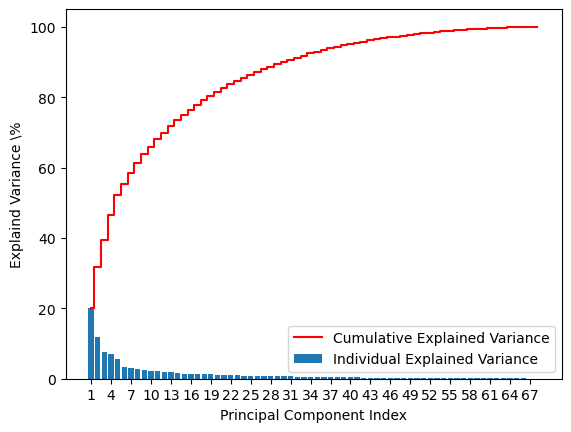

(1059, 68)


In [21]:
#Part a
import numpy as np
import matplotlib.pyplot as plt

#Compute the sample covariance matrix 
latitude_mean = np.mean(X, axis = 0)
data_mean_sub = X - latitude_mean
obser_num = np.size(y)
data_cov = (data_mean_sub.T@data_mean_sub)/(obser_num - 1)
#print(data_cov)
print(data_cov.shape)

#Perform the eigen decomposition of the covariance matrix
eig, eVec = np.linalg.eigh(data_cov)
eig = eig[::-1]
eVec = eVec[:,::-1]
pca_var = [(i/np.sum(eig)) * 100 for i in eig]
pca_var_cumulative = np.cumsum(pca_var)

plt.bar(range(1, 69), pca_var, align='center',\
        label='Individual Explained Variance')

plt.step(range(1, 69), pca_var_cumulative, where='mid', \
         label='Cumulative Explained Variance', color='red')
plt.xlabel('Principal Component Index')
plt.ylabel('Explaind Variance \%')
plt.legend(loc='best')
plt.xticks(ticks=np.arange(1,69,3))
plt.show()

#data projection
data_proj = data_mean_sub @ eVec[:,:]
print(data_proj.shape)

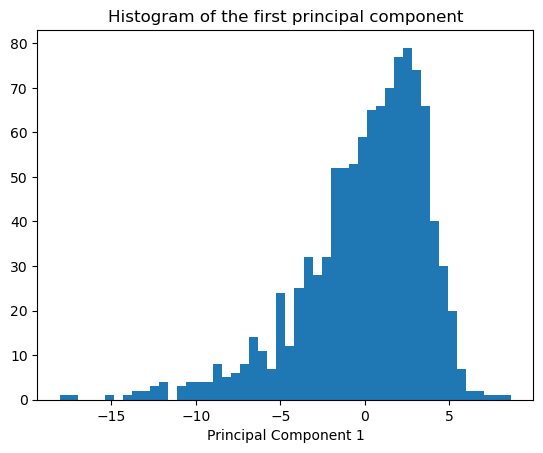

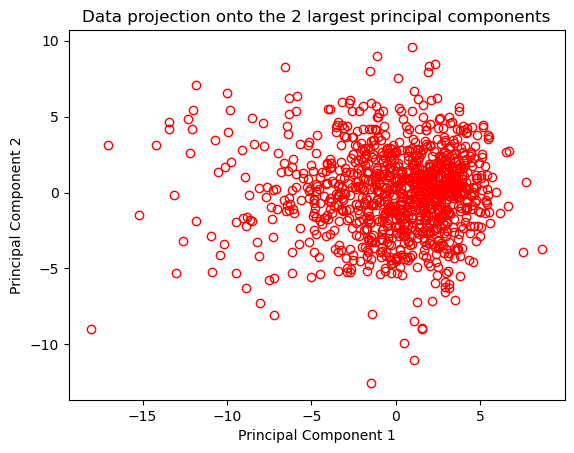

In [22]:
# data projection plot check, nvm this part

data_proj = data_mean_sub @ eVec[:,:2]


# show a histogram of the first principal component
plt.hist(data_proj.iloc[:,0],bins=50)
plt.title('Histogram of the first principal component')
plt.xlabel('Principal Component 1')
plt.show()

# display the results

plt.plot(data_proj.iloc[:,0],data_proj.iloc[:,1],'ro',mfc='none')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title('Data projection onto the 2 largest principal components')

plt.show()

In [23]:
#Part b and c
from sklearn.decomposition import PCA

def linear_regression_pca(k):
    model = LinearRegression()
    model.fit(pca.transform(X)[:, :k], y)
    return model.coef_[0]

pca = PCA()
pca.fit(X)

for i in range(68):
    if i == 0:
        print(f"Estimated coefficient for PC1 on PC1 only: {linear_regression_pca(1)}")
    elif i == 1:
        print(f"Estimated coefficient for PC1 on PC1 and PC2 only: {linear_regression_pca(2)}")
    elif i == 2:
        print(f"Estimated coefficient for PC1 on PC1, PC2, and PC3 only: {linear_regression_pca(3)}")
    elif i == 67:
        print(f"Estimated coefficient for PC1 on PC1, PC2, PC3……and PC{i+1}: {linear_regression_pca(i+1)}")

Estimated coefficient for PC1 on PC1 only: -0.08259022735453167
Estimated coefficient for PC1 on PC1 and PC2 only: -0.08259022735453168
Estimated coefficient for PC1 on PC1, PC2, and PC3 only: -0.08259022735453168
Estimated coefficient for PC1 on PC1, PC2, PC3……and PC68: -0.08259022735453303


### Question 3 (3 pts)

a) What do you observe in terms of estimated coefficients of **F1** when the number of regressors are increased compared to the estimated coefficients of **PC1** when the number of regressors are increased?

b) Explain the reason behind this observation.

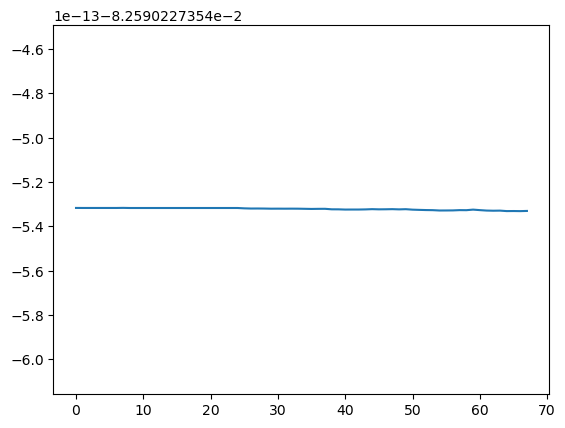

In [ ]:
list = []
for i in range(68):
    list.append(linear_regression_pca(i+1))
    
plt.plot(list)

Answer:  
a) The estimateed coefficients of F1 are different when the number of regressors are different. It increase when the regressors are increased. The coefficient PC1 is nearly the same and have a little decrease when the number of regressors increase.  
b) Because in normal linear regression we're trying to predict a particular variable y, what linear regression does is use all values of x to predict y. In PCA, however, there is no distinction, and no particular variable y needs to be predicted. Instead, a set of traits are all treated equally, none of which are special. When doing normal linear regression, as the independent regressors increases, the coefficient will change. However, when the variables processed by PCA are subjected to linear regression, the high-dimensional data has been reduced to the point that the regression variables are orthogonal, and the variables are unified, so when adding features, the estimated coefficient will not change much.

### Question 4 (2 pts)

a) Print the correlation matrix of all the PC's.

b) Which matrix does it closely resemble to? 

c) Which feature of the principal components is depicted through this matrix?

[[ 1.00000000e+00  1.12811362e-16  1.27200111e-17 ...  8.73701234e-16
  -3.19194517e-16 -7.60645658e-16]
 [ 1.12811362e-16  1.00000000e+00 -2.41605203e-16 ... -3.60338364e-17
   3.40177964e-15 -3.86529405e-15]
 [ 1.27200111e-17 -2.41605203e-16  1.00000000e+00 ... -6.92300667e-16
  -1.16521892e-15 -2.90274275e-15]
 ...
 [ 8.73701234e-16 -3.60338364e-17 -6.92300667e-16 ...  1.00000000e+00
   2.37947277e-16  7.23304226e-15]
 [-3.19194517e-16  3.40177964e-15 -1.16521892e-15 ...  2.37947277e-16
   1.00000000e+00 -7.05567954e-14]
 [-7.60645658e-16 -3.86529405e-15 -2.90274275e-15 ...  7.23304226e-15
  -7.05567954e-14  1.00000000e+00]]


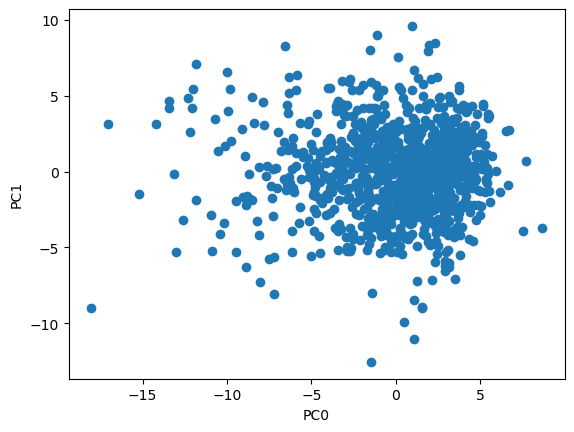

In [24]:
#4a
X_PCA = eVec[:, :].T @ X.T
print(np.corrcoef(X_PCA))

# Plot first two principle
plt.plot(X_PCA.T.iloc[:,0], X_PCA.T.iloc[:,1], 'o')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.plot()
plt.show()

Answer:  
4b) It's closely resemble to the covariance matrix.  
4c) It depicted the variable scales of the latitude of the country. There's a plot for the first two principle component to compare with the covariance matrix. And we can see that we better use the covariance matrix when the variable scales are similar and the correlation matrix when variables are on different scales.